1. Implementar algoritmo de
segmentación con K-Means
usando SkLearns
2. Comparar resultados con
implementación con OpenCV
cv.kmeans()

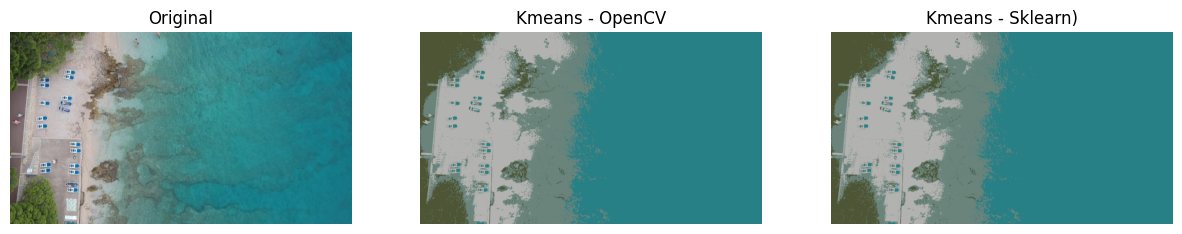

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
!pip install opencv-python scikit-learn

In [40]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 1919.5, 1079.5, -0.5)

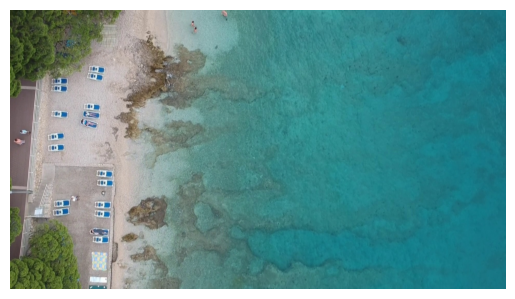

In [41]:
# Leer la imagen
image = cv2.imread('/content/drive/MyDrive/Computervision/Proyecto1/Orto/g_146.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')

### **Implementar algoritmo de segmentación con K-Means usando SkLearns**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


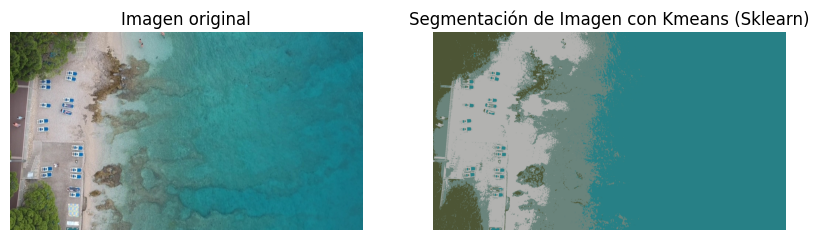

In [37]:
# Obtener las dimensiones de la imagen y convertirla matriz
height, width = image_rgb.shape[:2]
image_2d = image_rgb.reshape((height * width, 3))

# número de clusters
k = 4

# Ejecutar K-Means
kmeans = KMeans(n_clusters=k)
kmeans.fit(image_2d)

# consigo los clusters y los centros de los clusters
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Reconstruir la imagen segmentada
segmented_Sklearn = centers[labels].reshape(image_rgb.shape).astype(np.uint8)

# Mostrar la imagen original y la imagen segmentada
plt.figure(figsize=(10, 5))

# Subtrama 1: Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')
plt.axis('off')

# Subtrama 2: Imagen segmentada
plt.subplot(1, 2, 2)
plt.imshow(segmented_Sklearn)
plt.title('Segmentación de Imagen con Kmeans (Sklearn)')
plt.axis('off')

plt.show()

### **Comparar resultados con implementación con OpenCV cv2.kmeans()**

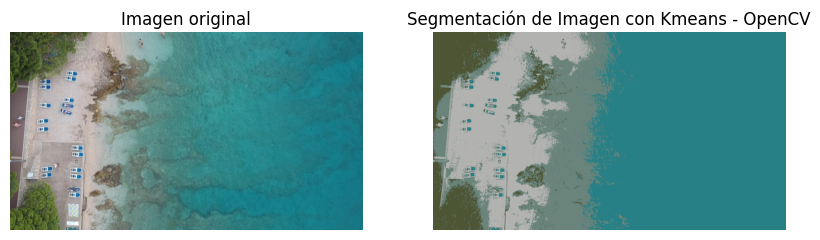

In [42]:
# Flatten de la imagen para los Pixeles.
pixel_values = image_rgb.reshape((-1, 3)).astype(np.float32)

# Definir los parámetros de K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 4

# Ejecutar K-Means con OPENCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros a valores enteros de 8 bits
centers = np.uint8(centers)
segmented_opencv = centers[labels.flatten()]

# Reconstruir la imagen segmentada
segmented_opencv = segmented_opencv.reshape(image_rgb.shape)

# Mostrar resultados
plt.figure(figsize=(10, 5))

# Subtrama 1: Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen original')
plt.axis('off')

# Subtrama 2: Imagen segmentada
plt.subplot(1, 2, 2)
plt.imshow(segmented_opencv)
plt.title('Segmentación de Imagen con Kmeans - OpenCV')
plt.axis('off')

plt.show()

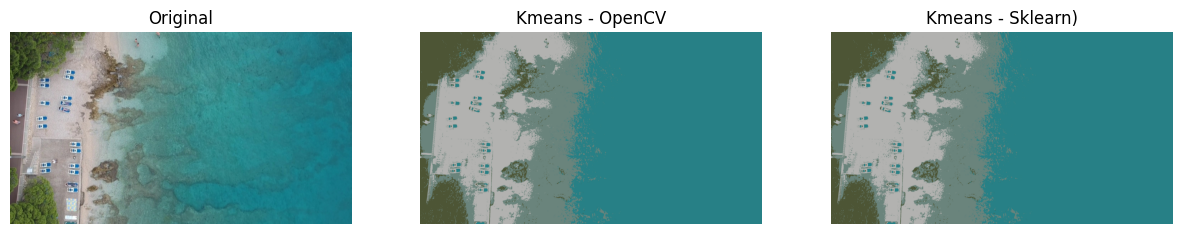

In [51]:
# Resultados
plt.figure(figsize=(15, 6))
# Subtrama 1: Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original')
plt.axis('off')
# Subtrama 2: Imagen segmentada OPENCV
plt.subplot(1, 3, 2)
plt.imshow(segmented_opencv)
plt.title('Kmeans - OpenCV')
plt.axis('off')
# Subtrama 3: Imagen segmentada SKLEARN
plt.subplot(1, 3, 3)
plt.imshow(segmented_Sklearn)
plt.title('Kmeans - Sklearn)')
plt.axis('off')

plt.show()